In [116]:
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np   
import pandas as pd
import scipy.constants as con

import arc 
import arc.beta as beta

In [ ]:
#define atom for ARC
atom = arc.Ytterbium174()

This is to caliculate the 171 Yb energy structure including higpower fine structure. I will copy the method of Ding 2018 (https://arxiv.org/pdf/1808.05987.pdf). Arc is used for the $^{171}$Yb quantum defect data.

In [299]:
I = 1/2 #nuclear spin
deltaE = 2*np.pi*12.6428121e9 #GHz the spliting of 171Yb+
Rinf = con.physical_constants['Rydberg constant times c in Hz'][0] 
au = con.physical_constants['atomic mass constant'][0] 

m_Yb174 = 173.938859*au #mass of 174Yb [kg] from NIST database
m_Yb171 = 170.936323*au #mass of 171Yb [kg] from NIST database

m_e = 9.1093837015e-31 #mass of electron [kg]
#electron reduced mass 
#(this would be a bit rigolus. to make it rigolas I should use ion mass?)
m174 = m_e*(m_Yb174-m_e)/m_Yb174
m171 = m_e*(m_Yb171-m_e)/m_Yb171

#conversion from Hz to cm-1
Hztocmm1 = 1/con.c/1e2

deltaE = 12.6428121e9 #Hz the spliting of 171Yb+
E0Yb = 50443.07074/Hztocmm1 #Hz (from NIST database ionization energy :50443.2 cm^-1)

In [300]:
print('Thompson paper reduced Rydberg const    : 109736.96959 cm-1')
print('Calculated value Rinf/con.c*m174/m_e/1e2: {} cm-1'.format(Rinf*m174/m_e*Hztocmm1))

Thompson paper reduced Rydberg const    : 109736.96959 cm-1
Calculated value Rinf/con.c*m174/m_e/1e2: 109736.96958477335 cm-1


In [303]:
50443.07074/Hztocmm1/1e12

1512.245216621248

In [313]:
m_e/au

0.0005485799090624057

In [316]:
print(45932.09/Hztocmm1/1e12)
print(45932.1943/Hztocmm1/1e12)

1377.009416217722
1377.0125430530593


# 174Yb 3S1 data from thompson paper(https://arxiv.org/pdf/1912.08754.pdf)

Currently ARC does not cover this thompson paper and this transtion, so I will make the function by my self.

In [309]:
def QuantumDefect3S1(n):
    return 4.4382 + 6/(n-4.4382)**2 -1.8e4/(n-4.4382)**4 + 1.8e7/(n-4.4382)**6 -7e9/(n-4.4382)**8

def Yb174Energy3S1(n):
    return E0Yb-Rinf*m174/m_e/ ((n -  QuantumDefect3S1(n))**2) #Hz

def Yb171Energy3S1(n):
    #(m171/m_e)*Rinf
    return E0Yb +1/4*deltaE - Rinf*m171/m_e/ ((n -  QuantumDefect3S1(n))**2) #Hz

# 174Yb energy for sanity check

ARC provides experimentally determined quantum defect data for $^{174}$Sr using multiple references. (https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/_modules/arc/divalent_atom_data.html#Strontium88.getPressure)

In [294]:
N=np.arange(30,100,1)

#quantum defect data import for 88Sr
Yb3S1_qd = QuantumDefect3S1(N)

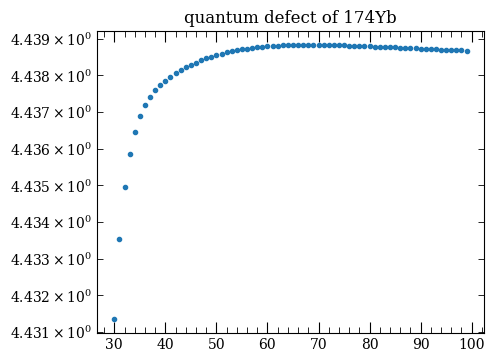

In [211]:
#plot
fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)
plt.title('quantum defect of 174Yb')
axes.semilogy(N,Yb3S1_qd,'.',label="$n{}^3S_{1}$")

plt.show()

In [290]:
 QuantumDefect3S1(74)

4.438817312106903

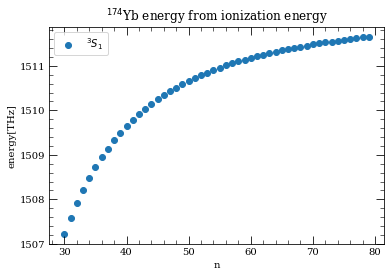

In [304]:
plt.scatter(N,Yb174Energy3S1(N)/1e12, label= '$^3S_1$ ')

plt.title('$^{174}$Yb energy from ionization energy')
plt.xlabel('n')
plt.ylabel('energy[THz]')

plt.legend()
plt.show()

In [305]:
#from quantum defect calc
print('Thompson paper 174 Yb 6s75s3S1      : 50420.3921 cm-1')
print('Calculated value from quantum defect: {} cm-1'.format(Yb174Energy3S1(74)*Hztocmm1))
differenceB = Yb174Energy3S1(74)- 50420.3921/Hztocmm1  
print('Difference: {} GHz'.format(differenceB/1e9))

Thompson paper 174 Yb 6s75s3S1      : 50420.3921 cm-1
Calculated value from quantum defect: 50420.39199341272 cm-1
Difference: -0.00319540625 GHz


# Calculation of the energy of 171Yb

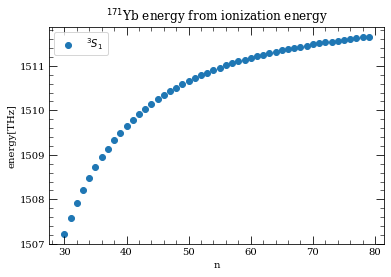

In [310]:
N=np.arange(30,80,1)
plt.scatter(N,Yb171Energy3S1(N)/1e12, label= '$^3S_1$ ')

plt.title('$^{171}$Yb energy from ionization energy')
plt.xlabel('n')
plt.ylabel('energy[THz]')

plt.legend()
plt.show()

In [311]:
print('***Calculated value from quantum defect of 171 Yb 6s76s3S1: {} THz'.format((Yb171Energy3S1(76))/1e12))
print('***Calculated value from quantum defect of 171 Yb 6s75s3S1: {} THz'.format((Yb171Energy3S1(75))/1e12))
print('***Calculated value from quantum defect of 171 Yb 6s74s3S1: {} THz'.format((Yb171Energy3S1(74))/1e12))

***Calculated value from quantum defect of 171 Yb 6s76s3S1: 1511.6027974049332 THz
***Calculated value from quantum defect of 171 Yb 6s75s3S1: 1511.5844594415173 THz
***Calculated value from quantum defect of 171 Yb 6s74s3S1: 1511.565324940537 THz


In [312]:
#from quantum defect calc
n=74
print('Thompson paper 171 Yb 6s74s3S1      : 1511.569505 THz')
print('Calculated value from quantum defect: {} THz'.format(Yb171Energy3S1(n)/1e12))
difference = (Yb171Energy3S1(n)/1e12-1511.569505) *1e12
print('Difference: {} GHz'.format(difference/1e9))

Thompson paper 171 Yb 6s74s3S1      : 1511.569505 THz
Calculated value from quantum defect: 1511.565324940537 THz
Difference: -4.180059462896679 GHz


In [217]:
for n in range(30,100):
    print('Calculated value from quantum defect of 171 Yb 6s{}s3S1: {} THz'.format(n,(Yb171Energy3S1(n)-difference)/1e12))

Calculated value from quantum defect of 171 Yb 6s30s3S1: 1507.2171975510535 THz
Calculated value from quantum defect of 171 Yb 6s31s3S1: 1507.588103128062 THz
Calculated value from quantum defect of 171 Yb 6s32s3S1: 1507.9197149144757 THz
Calculated value from quantum defect of 171 Yb 6s33s3S1: 1508.2172970484849 THz
Calculated value from quantum defect of 171 Yb 6s34s3S1: 1508.4852987777356 THz
Calculated value from quantum defect of 171 Yb 6s35s3S1: 1508.7274856805666 THz
Calculated value from quantum defect of 171 Yb 6s36s3S1: 1508.9470537782076 THz
Calculated value from quantum defect of 171 Yb 6s37s3S1: 1509.146725489569 THz
Calculated value from quantum defect of 171 Yb 6s38s3S1: 1509.3288290366243 THz
Calculated value from quantum defect of 171 Yb 6s39s3S1: 1509.4953636942073 THz
Calculated value from quantum defect of 171 Yb 6s40s3S1: 1509.6480532945839 THz
Calculated value from quantum defect of 171 Yb 6s41s3S1: 1509.7883901313278 THz
Calculated value from quantum defect of 17

In [229]:
for n in range(30,100):
    clockFreq = 518.295836
    Rydberg = (Yb171Energy3S1(n)-difference)/1e12 
    ClockRydberg = Rydberg - clockFreq
    Freq604 = (ClockRydberg*1e12 - 400e6)/2/1e12 
    lam1582 = 1581.9e-9
    Freq1582 = con.c/lam1582*1e-12
    Freq976 = Freq604 - Freq1582
    print('n: {} Freq604:{} THz, Freq976:{} THz'.format(n,Freq604,Freq976))



n: 30 Freq604:494.4604807755268 THz, Freq976:304.94631553120036 THz
n: 31 Freq604:494.64593356403094 THz, Freq976:305.1317683197045 THz
n: 32 Freq604:494.8117394572378 THz, Freq976:305.2975742129114 THz
n: 33 Freq604:494.9605305242424 THz, Freq976:305.446365279916 THz
n: 34 Freq604:495.09453138886784 THz, Freq976:305.5803661445414 THz
n: 35 Freq604:495.21562484028334 THz, Freq976:305.7014595959569 THz
n: 36 Freq604:495.3254088891038 THz, Freq976:305.8112436447774 THz
n: 37 Freq604:495.4252447447845 THz, Freq976:305.9110795004581 THz
n: 38 Freq604:495.5162965183121 THz, Freq976:306.0021312739857 THz
n: 39 Freq604:495.59956384710364 THz, Freq976:306.0853986027772 THz
n: 40 Freq604:495.6759086472919 THz, Freq976:306.1617434029655 THz
n: 41 Freq604:495.7460770656639 THz, Freq976:306.23191182133746 THz
n: 42 Freq604:495.81071753431684 THz, Freq976:306.2965522899904 THz
n: 43 Freq604:495.8703956681615 THz, Freq976:306.3562304238351 THz
n: 44 Freq604:495.92560660358623 THz, Freq976:306.411441

In [324]:
n = 55
clockFreq = 518.295836
Rydberg = (Yb171Energy3S1(n)-difference)/1e12 
ClockRydberg = Rydberg - clockFreq
Freq604 = (ClockRydberg*1e12 - 400e6)/2/1e12 
Freq976 = 306.8168
Freq1582 = Freq604 - Freq976

lam1582 = con.c/Freq1582*1e-12*1e9

print('n: {} Freq604:{} THz, Freq1582:{} nm'.format(n,Freq604,lam1582))

n: 55 Freq604:496.3331414742691 THz, Freq1582:1581.8818349271653 nm


# Estimaed zeeman shift

In [1]:
uB = 5.7883818012e-5/1e4 #eV/G
gFmeasure = 1.35
mF = 3/2
B = 32.16 #G
eVtoHz = 241.7990504e12
print('Estimated zeeman shift of 3S1: {} MHz'.format((uB*gFmeasure*mF*B*eVtoHz/1e6)))

Estimated zeeman shift of 3S1: 91.14919301501955 MHz


# C6 scaling calculation

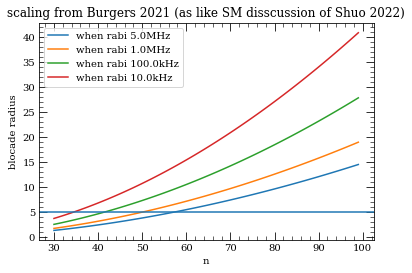

In [161]:
C6 = 15e9 #um^6
def Rb(Omega, n ):
    return (C6/Omega*2*np.pi*((n-4.439)/(50-4.439))**11)**(1/6)

Omega = 2*np.pi*5e6 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}MHz'.format(Omega/(2*np.pi)*1e-6))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e6 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}MHz'.format(Omega/(2*np.pi)*1e-6))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e5 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}kHz'.format(Omega/(2*np.pi)*1e-3))
plt.xlabel('n')
plt.ylabel('blocade radius')

Omega = 2*np.pi*1e4 #1MHz

plt.plot(N,Rb(Omega, N),label='when rabi {}kHz'.format(Omega/(2*np.pi)*1e-3))
plt.xlabel('n')
plt.ylabel('blocade radius')

plt.legend()
plt.title('scaling from Burgers 2021 (as like SM disscussion of Shuo 2022)')

plt.axhline(y=5)

# Assume we want to have Inetraction = 10*Omega how much rabi freq do we need for each n?

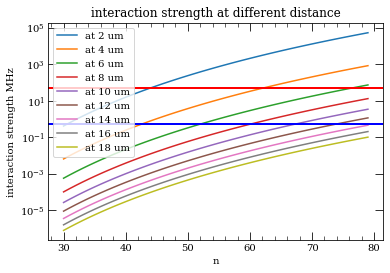

In [286]:
def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

for r in range(2,20,2):
    #Interaction strength at 2um
    N =  np.arange(30,80,dtype = float)
    V =  C6(N)/r**6

    plt.plot(N,V/1e6,label='at {} um'.format(r))
    plt.xlabel('n')
    plt.ylabel('interaction strength MHz')
    plt.yscale('log')
    plt.axhline(y=50,color='r')
    plt.axhline(y=0.5,color='b')

    plt.legend()
    plt.title('interaction strength at different distance')


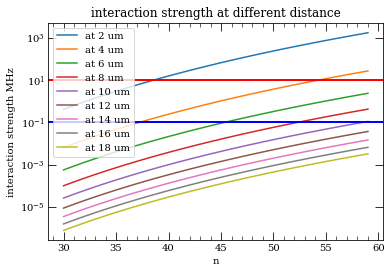

In [288]:
def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

for r in range(2,20,2):
    #Interaction strength at 2um
    N =  np.arange(30,60,dtype = float)
    V =  C6(N)/r**6

    plt.plot(N,V/1e6,label='at {} um'.format(r))
    plt.xlabel('n')
    plt.ylabel('interaction strength MHz')
    plt.yscale('log')
    plt.axhline(y=10,color='r')
    plt.axhline(y=0.1,color='b')

    plt.legend()
    plt.title('interaction strength at different distance')


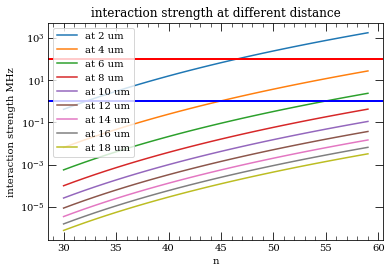

In [289]:
def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

for r in range(2,20,2):
    #Interaction strength at 2um
    N =  np.arange(30,60,dtype = float)
    V =  C6(N)/r**6

    plt.plot(N,V/1e6,label='at {} um'.format(r))
    plt.xlabel('n')
    plt.ylabel('interaction strength MHz')
    plt.yscale('log')
    plt.axhline(y=100,color='r')
    plt.axhline(y=1,color='b')

    plt.legend()
    plt.title('interaction strength at different distance')


C:\Users\klab\AppData\Local\Temp\ipykernel_18268\1972869161.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,30)
C:\Users\klab\AppData\Local\Temp\ipykernel_18268\1972869161.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,30)
C:\Users\klab\AppData\Local\Temp\ipykernel_18268\1972869161.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,30)
C:\Users\klab\AppData\Local\Temp\ipykernel_18268\1972869161.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,30)
C:\Users\klab\AppData\Local\Temp\ipykernel_18268\1972869161.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,30)
C:\Users\klab\AppData\Local\Temp\ipykern

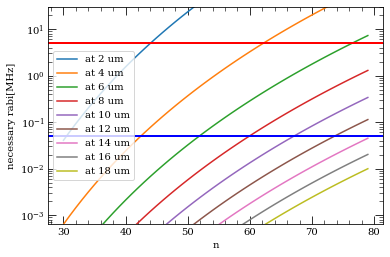

In [284]:
# necessary rabi-freq

def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

for r in range(2,20,2):
    flip3 = 1/0.5*1e6 # rabi freq to flip 3 times in 1.5us
    #Interaction strength at 2um
    N =  np.arange(30,80,dtype = float)
    V =  C6(N)/r**6

    plt.plot(N,V/10/1e6,label='at {} um'.format(r))
    plt.xlabel('n')
    plt.ylabel('necessary rabi[MHz]')
#    plt.axhline(y=2,color='r')
#    plt.axhline(y=20,color='b')
    plt.axhline(y=5,color='r')
    plt.axhline(y=5e-2,color='b')
    plt.ylim(0,30)
    plt.yscale('log')

    plt.legend()
    plt.title('')




In [255]:
np.sqrt(1/99)

0.10050378152592121

# n = 55

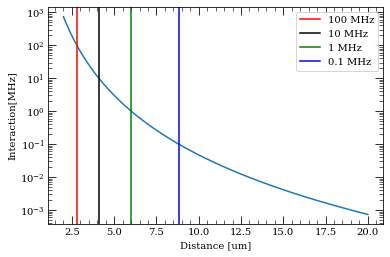

In [355]:
def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

R = np.linspace(2,20,100)
plt.plot(R ,C6(55)/R**6/1e6)
for v,c in zip([100,10,1,0.1],['red','k','green','blue']):
    line = (C6(55)/1e6/v)**(1/6)
    plt.axvline(x=line,label ='{} MHz'.format(v), color =c)

plt.legend()
plt.xlabel('Distance [um]')
plt.ylabel('Interaction[MHz]')
plt.yscale('log')

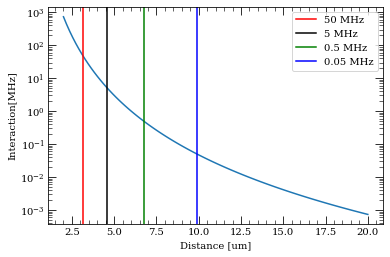

In [362]:
def C6(n, qd = 4.439):
    return 15e9*((n-qd)/(50-qd))**11 #Hz*um^6 from 174Yb n=50 data

R = np.linspace(2,20,100)
plt.plot(R ,C6(55)/R**6/1e6)
for v,c in zip([50,5,0.5,0.05],['red','k','green','blue']):
    line = (C6(55)/1e6/v)**(1/6)
    plt.axvline(x=line,label ='{} MHz'.format(v), color =c)

plt.legend()
plt.xlabel('Distance [um]')
plt.ylabel('Interaction[MHz]')
plt.yscale('log')

In [364]:
(C6(55)/0.5e6)**(1/6)

6.746750071637784

In [358]:
np.exp(-0.135/39)

0.9965444457558643

In [359]:
np.exp(-0.3/39)

0.9923372023911488

In [361]:
np.pi*20**2/0.302

4161.049872304362